# UNIDADE 2: Tratamento dos dados

2.1. Análise exploratória de dados (EDA)</br>
2.2. Limpeza de dados</br>
2.3. Transformação de dados</br>
2.3.1. Divisão dos dados</br>
2.3.2. Balanceamento</br>
2.3.3. Escalonamento</br>
2.3.4. Codificação e criação de features</br>
2.4. Redução de dimensionalidade</br>


# Classificação Binária

A classificação em uma de duas classes é um problema comum em aprendizado de máquina. Você pode querer prever se um cliente provavelmente fará uma compra ou não, se uma transação de cartão de crédito foi fraudulenta ou não. Todos esses são problemas de <span style="color:red">classificação binária por terem apenas duas possibilidades de resposta</span>.

Nos seus dados brutos, as classes podem ser representadas por strings como "Sim" e "Não". <span style="color:red">Antes de usar esses dados, atribuiremos um rótulo de classe: uma classe será 0 e a outra será 1</span>.

<div style="border: 2px solid #00008B; padding: 15px; border-radius: 10px; background-color: #00008B; color: #FFFFFF; font-family: Arial;">
  <h1 style="margin-top: 0;">Planejamento de Sucessão</h1>
  <p>Descrição: Identificar funcionários com potencial para ocupar cargos de liderança no futuro e planejar a sucessão de cargos críticos</p>
  <p>Dados sintéticos produzidos pelo ChatGPT, baseado no projeto Google Oxygen: Como a Google usou dados para ver se os gerentes fazem diferença?</p>
</div>


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
  <ul>
    <li>Idade do funcionário (valores inteiros  de 18 a 75)</li>
    <li>Nível de educação (valores Superior, Médio, Doutorado, Especialização)</li>
    <li>Avaliação de desempenho (valores inteiros  entre 0 e 5)</li>
    <li>Experiência em cargos de liderança(valores 0 ou 1)</li>
    <li>Habilidades e competências (valores inteiros entre 0 a 10)</li>
    <li>Participação em treinamentos de liderança (valores S ou N)</li>
    <li>Feedback de supervisores (valores reais enter 0.0 e 1.0)</li>
    <li>Satisfação no trabalho (valores inteiros entre 0 e 5)</li>
    <li>É um bom coach (valores S ou N)</li>
    <li>Empodera a equipe e não faz microgestão (valores S ou N)</li> 
    <li>Exprime interesse e preocupação pelo sucesso e bem-estar pessoal dos membros da equipe (valores S ou N)</li>
    <li>É produtivo e orientado para os resultados (valores S ou N)</li>
    <li>É bom comunicador - escuta e compartilha informações (valores S ou N)</li>
    <li>Ajuda com desenvolvimento de carreira (valores S ou N)</li>
    <li>Tem uma visão clara e estratégia para a equipe (valores S ou N)</li>
    <li>Possui habilidades técnicas fundamentais que o ajudam a aconselhar a equipe (valores S ou N)</li>
    <li><b>Lider (valores S ou N)</b></li>
  </ul>
</div>


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
  <h3>Fluxo no Pipeline</h3>
  <ul>
    <li><b>Ingestão de Dados</b>: Coleta e armazenamento de dados brutos.</li>
    <li><b>Análise Exploratória</b>: Utilização dos dados para EDA.</li>
    <li><b><span style="color:red">Pré-processamento</b>: Limpeza e transformação dos dados.</span></li>
    <li><b><span style="color:red">Normalização e Engenharia de Features</b>: Criação de datasets normalizados e finalizados para treinamento.</span></li>
    <li><b>Treinamento de Modelos</b>: Utilização dos dados de treinamento e validação para treinar e validar modelos.</li>
    <li><b>Implantação de Modelos</b>: Armazenamento dos modelos treinados em um Model Registry.</li>
    <li><b>Inferência</b>: Utilização de dados de inferência para obter predições dos modelos em produção.</li>
  </ul>

Considerações de MLOps

  <ul>
    <li><b>Versionamento</b>: Versionar tanto os dados quanto os modelos para garantir a reprodutibilidade.</li>
    <li><b>Monitoramento</b>: Implementar monitoramento contínuo dos modelos em produção para detectar drifts de desempenho.</li>
    <li><b>Automatização</b>: Automatizar o pipeline de dados e modelos utilizando ferramentas de CI/CD.</li>
    <li><b>Segurança</b>: Garantir a segurança e conformidade dos dados, especialmente se envolver dados sensíveis.</li>
  </ul>

</div>


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:.5f}'.format)
np.random.seed(0)

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import joblib

from tqdm import tqdm
tqdm.pandas()

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Ingestão de Dados

In [3]:
df_servidor = pd.read_csv("../data/raw/planejamento_sucessao.csv", sep=";")

In [4]:
df_servidor.head(5)

,Idade,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas
0,56.00000,Especialização,4.00000,0.00000,6.00000,S,0.45086,4.00000,N,N,S,N,N,N,N,S,N
1,69.00000,Superior,4.00000,0.00000,8.00000,N,0.09666,0.00000,N,N,S,N,S,N,N,S,N
2,46.00000,Médio,2.00000,0.00000,2.00000,N,0.33515,4.00000,N,N,S,N,S,N,N,S,N
3,32.00000,Superior,5.00000,0.00000,2.00000,S,0.50688,4.00000,N,N,S,N,S,N,N,S,N
4,60.00000,Médio,4.00000,0.00000,7.00000,N,0.73274,0.00000,N,N,S,N,S,N,N,S,N


# Limpeza e transformação de dados

A limpeza e transformação de dados são passos que garantem a qualidade e a usabilidade dos dados para análises e modelagens subsequentes. Essas etapas ajudam a eliminar ruídos, melhorar a precisão dos modelos.


### Limpeza de Dados


<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<h3>Correção de Erros de Digitação</h3>
Identificação e correção de valores que foram inseridos incorretamente devido a erros de digitação ou inconsistências de formato.
</div>

In [5]:
df_servidor["Treinamento_lideranca"].unique()

array(['S', 'N', 'D', 'n'], dtype=object)

In [6]:
# Transformar os valores com erros de digitação
df_servidor['Treinamento_lideranca'] = df_servidor['Treinamento_lideranca'].replace('n', 'N')
df_servidor = df_servidor[df_servidor['Treinamento_lideranca'] != 'D']

In [7]:
df_servidor["Treinamento_lideranca"].unique()

array(['S', 'N'], dtype=object)

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<h3>Remoção de Duplicata</h3>
Identificação e remoção de registros duplicados para evitar a contagem redundante de dados.
</div>

*  **duplicated():**  retorna uma Series booleana indicando se uma linha é duplicada ou não.
*  **keep='first':** especifica qual duplicata deve ser marcada como não duplicada:
     *  **'first':** a primeira ocorrência de uma linha não será marcada como duplicada (False), enquanto as ocorrências subsequentes serão (True).
    *  **'last':** Marca todas as ocorrências, exceto a última, como duplicadas.
    *  **False:** Marca todas as ocorrências de duplicatas como True.

In [8]:
#Identificando se tem duplicatas
df_servidor.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4900, dtype: bool

In [9]:
duplicadas = df_servidor.duplicated(keep='first')
linhas_duplicadas = df_servidor[duplicadas]

In [10]:
linhas_duplicadas

,Idade,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas
1425,61.00000,Doutorado,3.00000,0.00000,10.00000,N,0.86072,2.00000,N,N,N,N,N,S,N,N,N


*  **drop_duplicates():** remove as linhas duplicadas do DataFrame. Por padrão, mantém a primeira ocorrência de cada linha duplicada e remove as ocorrências subsequentes.

In [11]:
#Apagando as duplictas
df_servidor = df_servidor.drop_duplicates()

In [12]:
df_servidor[df_servidor.duplicated(keep='first')]

,Idade,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas


<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<h3>Tratamento de Ausentes</h3>
    - <b>Remoção de Linhas/Colunas</b>: Linhas ou colunas com muitos valores ausentes podem ser removidas.</br>
    - <b>Imputação</b>: Valores ausentes podem ser substituídos por valores como a média, mediana, moda ou valores derivados de métodos mais sofisticados, como K-Nearest Neighbors.
</div>

In [13]:
df_servidor.isna().sum()

Idade                           96
Nivel_educacao                  94
Avaliacao_desempenho            98
Experiencia_cargos_lideranca    99
Habilidades_competencias        98
Treinamento_lideranca            0
Feedback_supervisores           98
Satisfacao_trabalho             99
Lider                            0
Coach                            0
Empodera                         0
Sucesso_membros                  0
Orientado_resultados             0
Comunicador                      0
Desenvolvimento_carreira         0
Estrategia_equipe                0
Habilidades_tecnicas             0
dtype: int64

*  **dropna():** remove linhas ou colunas com valores nulos.

In [14]:
# Eliminando as linhas com valores ausentes
df_servidor = df_servidor.dropna(subset=['Feedback_supervisores'])
df_servidor.isna().sum()

Idade                           95
Nivel_educacao                  91
Avaliacao_desempenho            95
Experiencia_cargos_lideranca    97
Habilidades_competencias        97
Treinamento_lideranca            0
Feedback_supervisores            0
Satisfacao_trabalho             96
Lider                            0
Coach                            0
Empodera                         0
Sucesso_membros                  0
Orientado_resultados             0
Comunicador                      0
Desenvolvimento_carreira         0
Estrategia_equipe                0
Habilidades_tecnicas             0
dtype: int64

*  **fillna():** preencher valores nulos com um valor específico.

In [15]:
# Imputar a média para a satisfação no trabalho
df_servidor['Satisfacao_trabalho'].fillna(df_servidor['Satisfacao_trabalho'].mean(), inplace=True)
df_servidor.isna().sum()

Idade                           95
Nivel_educacao                  91
Avaliacao_desempenho            95
Experiencia_cargos_lideranca    97
Habilidades_competencias        97
Treinamento_lideranca            0
Feedback_supervisores            0
Satisfacao_trabalho              0
Lider                            0
Coach                            0
Empodera                         0
Sucesso_membros                  0
Orientado_resultados             0
Comunicador                      0
Desenvolvimento_carreira         0
Estrategia_equipe                0
Habilidades_tecnicas             0
dtype: int64

In [16]:
df_servidor["Habilidades_competencias"].unique()

array([ 6.,  8.,  2.,  7.,  3.,  4.,  5., 10.,  9.,  0.,  1., nan, 90.])

In [17]:
# Imputar a média para a habilidades e competencias
df_servidor['Habilidades_competencias'].fillna(df_servidor['Habilidades_competencias'].mean(), inplace=True)
df_servidor.isna().sum()

Idade                           95
Nivel_educacao                  91
Avaliacao_desempenho            95
Experiencia_cargos_lideranca    97
Habilidades_competencias         0
Treinamento_lideranca            0
Feedback_supervisores            0
Satisfacao_trabalho              0
Lider                            0
Coach                            0
Empodera                         0
Sucesso_membros                  0
Orientado_resultados             0
Comunicador                      0
Desenvolvimento_carreira         0
Estrategia_equipe                0
Habilidades_tecnicas             0
dtype: int64

In [18]:
# Imputar 0 para a experiencia em cargos de lideranca
df_servidor['Experiencia_cargos_lideranca'].fillna(0, inplace=True)
df_servidor.isna().sum()

Idade                           95
Nivel_educacao                  91
Avaliacao_desempenho            95
Experiencia_cargos_lideranca     0
Habilidades_competencias         0
Treinamento_lideranca            0
Feedback_supervisores            0
Satisfacao_trabalho              0
Lider                            0
Coach                            0
Empodera                         0
Sucesso_membros                  0
Orientado_resultados             0
Comunicador                      0
Desenvolvimento_carreira         0
Estrategia_equipe                0
Habilidades_tecnicas             0
dtype: int64

**SimpleImputer** com a estratégia most_frequent, que substitui os **valores ausentes pelo valor mais frequente (moda)** na coluna.

In [19]:
# Imputação da avaliação de desempenho com o mais frequente
imputer = SimpleImputer(strategy='most_frequent')
df_servidor['Avaliacao_desempenho'] = imputer.fit_transform(df_servidor[['Avaliacao_desempenho']])
df_servidor.isna().sum()

Idade                           95
Nivel_educacao                  91
Avaliacao_desempenho             0
Experiencia_cargos_lideranca     0
Habilidades_competencias         0
Treinamento_lideranca            0
Feedback_supervisores            0
Satisfacao_trabalho              0
Lider                            0
Coach                            0
Empodera                         0
Sucesso_membros                  0
Orientado_resultados             0
Comunicador                      0
Desenvolvimento_carreira         0
Estrategia_equipe                0
Habilidades_tecnicas             0
dtype: int64

In [20]:
# Imputar Não Especifica para a Nivel_educacao
df_servidor['Nivel_educacao'].fillna('Não Especifica', inplace=True)
df_servidor.isna().sum()

Idade                           95
Nivel_educacao                   0
Avaliacao_desempenho             0
Experiencia_cargos_lideranca     0
Habilidades_competencias         0
Treinamento_lideranca            0
Feedback_supervisores            0
Satisfacao_trabalho              0
Lider                            0
Coach                            0
Empodera                         0
Sucesso_membros                  0
Orientado_resultados             0
Comunicador                      0
Desenvolvimento_carreira         0
Estrategia_equipe                0
Habilidades_tecnicas             0
dtype: int64

In [21]:
df_servidor['Idade'].isna().sum()

95

In [22]:
# Imputar a média para a idade
#df_servidor['Idade'].fillna(df_servidor['Idade'].mean(), inplace=True)

# Eliminando as linhas com valores ausentes
df_servidor = df_servidor.dropna(subset=['Idade'])

In [23]:
df_servidor['Idade'].isna().sum()

0

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<h3>Tratamento de Outliers</h3>
Aplicar métodos como o desvio interquartil ou z-score para identificar e tratar valores que se afastam significativamente dos demais dados.</br></br>
- <b>Remoção</b>: Outliers que são claramente erros podem ser removidos.</br>
- <b>Transformação</b>: Aplicação de transformações como logarítmica para reduzir o impacto de outliers.</br>
- <b>Substituição</b>: Substituir outliers por valores que estejam dentro de um intervalo aceitável.</br>
</div>

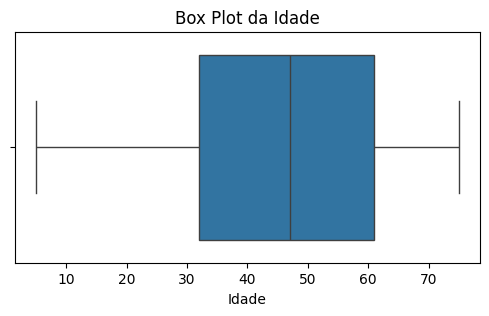

In [24]:
Q1 = df_servidor['Idade'].quantile(0.25)
Q3 = df_servidor['Idade'].quantile(0.75)

# Calcular o IQR (Intervalo Interquartil)
IQR = Q3 - Q1

# Definir os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar o DataFrame para remover linhas com outliers
df_servidor = df_servidor[(df_servidor['Idade'] >= limite_inferior) & (df_servidor['Idade'] <= limite_superior)]

plt.figure(figsize=(6, 3))
sns.boxplot(x=df_servidor['Idade'])
plt.title('Box Plot da Idade')
plt.xlabel('Idade')
plt.show()

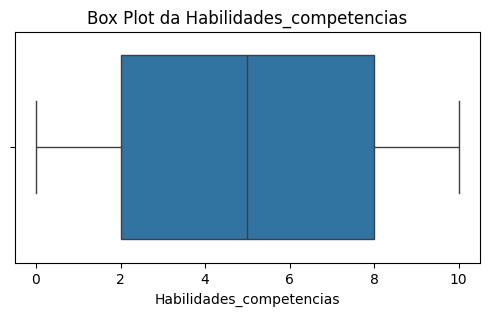

In [25]:
Q1 = df_servidor['Habilidades_competencias'].quantile(0.25)
Q3 = df_servidor['Habilidades_competencias'].quantile(0.75)

# Calcular o IQR (Intervalo Interquartil)
IQR = Q3 - Q1

# Definir os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar o DataFrame para remover linhas com outliers
df_servidor = df_servidor[(df_servidor['Habilidades_competencias'] >= limite_inferior) & (df_servidor['Habilidades_competencias'] <= limite_superior)]

plt.figure(figsize=(6, 3))
sns.boxplot(x=df_servidor['Habilidades_competencias'])
plt.title('Box Plot da Habilidades_competencias')
plt.xlabel('Habilidades_competencias')
plt.show()

### Transformação de Dados


2. **Criação de Novas Features (Feature Engineering)**:
    - **Combinação de Variáveis**: Criar novas variáveis combinando variáveis existentes.
    - **Transformações Matemáticas**: Aplicação de transformações como logaritmo, raiz quadrada ou quadrado para criar novas features.

4. **Transformação Logarítmica**:
    - Aplicada para reduzir a variação em dados altamente dispersos e trazer a distribuição mais próxima de uma distribuição normal.

6. **Agregação de Dados**:
    - Resumir dados detalhados em dados agregados, por exemplo, transformando dados diários em dados mensais para análise em nível superior.

7. **Transformações Baseadas em Domínio**:
    - Transformações específicas baseadas no conhecimento do domínio, como transformar vari modelos e fornecer uma base sólida para a tomada de decisões baseada em dados.
lida para a tomada de decisões baseada em dados.


<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<h3>Binning (ou Discretização)</h3>
Binning é o processo de transformar variáveis numéricas contínuas em variáveis categóricas discretas, dividindo o intervalo dos dados em bins (ou faixas). Isso pode ser útil para simplificar o modelo ou para lidar com a não-linearidade dos dados. Cada bin é rotulado com uma categoria específica.
</div>

*  **cut():** usada para segmentar e classificar os dados em intervalos.
    *  **bins:** Define os limites dos intervalos (bins). Pode ser uma lista de valores ou um número inteiro que define o número de bins de tamanho igual a serem criados.
    *  **labels:** Define os rótulos a serem atribuídos a cada intervalo. Deve ter o mesmo comprimento que bins menos um.
    *  **right=True:** Inclui o limite superior do intervalo (default é True).
    *  **include_lowest=True:** Inclui o menor valor no primeiro intervalo.

In [26]:
bins = [18, 30, 40, 50, 60, 75, 80, 85]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df_servidor['Idade'] = pd.cut(df_servidor['Idade'], bins=bins, labels=labels, right=True, include_lowest=True)
df_servidor["Idade"].unique()

['50-59', '60-69', '40-49', '30-39', '18-29', NaN]
Categories (7, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79' < '80-89']

In [27]:
df_servidor

,Idade,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas
0,50-59,Especialização,4.00000,0.00000,6.00000,S,0.45086,4.00000,N,N,S,N,N,N,N,S,N
1,60-69,Superior,4.00000,0.00000,8.00000,N,0.09666,0.00000,N,N,S,N,S,N,N,S,N
2,40-49,Médio,2.00000,0.00000,2.00000,N,0.33515,4.00000,N,N,S,N,S,N,N,S,N
3,30-39,Superior,5.00000,0.00000,2.00000,S,0.50688,4.00000,N,N,S,N,S,N,N,S,N
4,50-59,Médio,4.00000,0.00000,7.00000,N,0.73274,0.00000,N,N,S,N,S,N,N,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60-69,Especialização,0.00000,0.00000,6.00000,S,0.71530,0.00000,N,N,S,N,N,N,S,N,N
4996,50-59,Especialização,0.00000,0.00000,2.00000,S,0.48405,2.00000,N,N,S,N,N,N,N,N,N
4997,40-49,Médio,4.00000,0.00000,7.00000,N,0.63743,2.00000,N,N,S,N,N,N,N,N,N
4998,50-59,Superior,2.00000,0.00000,7.00000,S,0.61584,2.00000,N,N,S,N,N,N,N,N,N


<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<h3>Codificação de Variáveis Categóricas</h3>

A maioria dos algoritmos de aprendizado de máquina, como regressão linear, SVM, redes neurais, entre outros, operam com dados numéricos. Variáveis categóricas precisam ser convertidas para um formato numérico para que esses algoritmos possam processá-las.</br>
<b>Label Encoding</b>: Converte categorias em valores numéricos. Esta técnica é simples, mas pode introduzir uma ordem que não existe nas categorias originais.</br>
<b>One-Hot Encoding</b>: Cria colunas binárias para cada categoria, indicando a presença ou ausência da categoria.  Cada coluna representa uma categoria, e contém 1 se a categoria está presente ou 0 caso contrário. Isso evita a introdução de ordens artificiais.

<img src="../imagens/estado.png" width="500" height="200" />
<img src="../imagens/one-Hot.png" width="500" height="200" />

https://medium.com/@ingoreichertjr/label-encoding-e-one-hot-encoding-na-pr%C3%A1tica-6d2cb100e11e
</div>

*  **astype('category'):** Converte a coluna para o tipo de dado categórico.
*  **cat:** Acessa os atributos de categorização da coluna convertida.
*  **categories:** extrai as categorias únicas da coluna categórica.

In [28]:
categorias = df_servidor['Nivel_educacao'].astype('category').cat.categories
codigos = df_servidor['Nivel_educacao'].astype('category').cat.codes

print({codigo: categoria for codigo, categoria in enumerate(categorias)})

{0: 'Doutorado', 1: 'Especialização', 2: 'Médio', 3: 'Não Especifica', 4: 'Superior'}


In [29]:
# Label Encoding
df_servidor['Nivel_educacao'] = df_servidor['Nivel_educacao'].astype('category').cat.codes
df_servidor["Nivel_educacao"].unique()

array([1, 4, 2, 0, 3], dtype=int8)

In [30]:
categorias = df_servidor['Treinamento_lideranca'].astype('category').cat.categories
codigos = df_servidor['Treinamento_lideranca'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Treinamento_lideranca'] = df_servidor['Treinamento_lideranca'].astype('category').cat.codes
df_servidor["Treinamento_lideranca"].unique()

{0: 'N', 1: 'S'}


array([1, 0], dtype=int8)

In [31]:
categorias = df_servidor['Lider'].astype('category').cat.categories
codigos = df_servidor['Lider'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Lider'] = df_servidor['Lider'].astype('category').cat.codes
df_servidor["Lider"].unique()

{0: 'N', 1: 'S'}


array([0, 1], dtype=int8)

In [32]:
categorias = df_servidor['Coach'].astype('category').cat.categories
codigos = df_servidor['Coach'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Coach'] = df_servidor['Coach'].astype('category').cat.codes
df_servidor["Coach"].unique()

{0: 'N', 1: 'S'}


array([0, 1], dtype=int8)

In [33]:
categorias = df_servidor['Empodera'].astype('category').cat.categories
codigos = df_servidor['Empodera'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Empodera'] = df_servidor['Empodera'].astype('category').cat.codes
df_servidor["Empodera"].unique()

{0: 'N', 1: 'S'}


array([1, 0], dtype=int8)

In [34]:
categorias = df_servidor['Orientado_resultados'].astype('category').cat.categories
codigos = df_servidor['Orientado_resultados'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Orientado_resultados'] = df_servidor['Orientado_resultados'].astype('category').cat.codes
df_servidor["Orientado_resultados"].unique()

{0: 'N', 1: 'S'}


array([0, 1], dtype=int8)

In [35]:
categorias = df_servidor['Sucesso_membros'].astype('category').cat.categories
codigos = df_servidor['Sucesso_membros'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Sucesso_membros'] = df_servidor['Sucesso_membros'].astype('category').cat.codes
df_servidor["Sucesso_membros"].unique()

{0: 'N', 1: 'S'}


array([0, 1], dtype=int8)

In [36]:
categorias = df_servidor['Comunicador'].astype('category').cat.categories
codigos = df_servidor['Comunicador'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Comunicador'] = df_servidor['Comunicador'].astype('category').cat.codes
df_servidor["Comunicador"].unique()

{0: 'N', 1: 'S'}


array([0, 1], dtype=int8)

In [37]:
categorias = df_servidor['Desenvolvimento_carreira'].astype('category').cat.categories
codigos = df_servidor['Desenvolvimento_carreira'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Desenvolvimento_carreira'] = df_servidor['Desenvolvimento_carreira'].astype('category').cat.codes
df_servidor["Desenvolvimento_carreira"].unique()

{0: 'N', 1: 'S'}


array([0, 1], dtype=int8)

In [38]:
categorias = df_servidor['Estrategia_equipe'].astype('category').cat.categories
codigos = df_servidor['Estrategia_equipe'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Estrategia_equipe'] = df_servidor['Estrategia_equipe'].astype('category').cat.codes
df_servidor["Estrategia_equipe"].unique()

{0: 'N', 1: 'S'}


array([1, 0], dtype=int8)

In [39]:
categorias = df_servidor['Habilidades_tecnicas'].astype('category').cat.categories
codigos = df_servidor['Habilidades_tecnicas'].astype('category').cat.codes
print({codigo: categoria for codigo, categoria in enumerate(categorias)})

# Label Encoding
df_servidor['Habilidades_tecnicas'] = df_servidor['Habilidades_tecnicas'].astype('category').cat.codes
df_servidor["Habilidades_tecnicas"].unique()

{0: 'N', 1: 'S'}


array([0, 1], dtype=int8)

*  **get_dummies():** Converte a coluna categórica 'Idade' em várias colunas dummy, onde cada coluna representa uma categoria única da coluna original.
    *  **columns=['Idade']:** Especifica que a coluna 'Idade' deve ser convertida em variáveis dummy.
    *  **prefix='Idade':** Define um prefixo para os nomes das novas colunas dummy.

In [40]:
# One-Hot Encoding
df_servidor = pd.get_dummies(df_servidor, columns=['Idade'], prefix='Idade')
df_servidor

,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,...,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas,Idade_18-29,Idade_30-39,Idade_40-49,Idade_50-59,Idade_60-69,Idade_70-79,Idade_80-89
0,1,4.00000,0.00000,6.00000,1,0.45086,4.00000,0,0,1,...,0,1,0,False,False,False,True,False,False,False
1,4,4.00000,0.00000,8.00000,0,0.09666,0.00000,0,0,1,...,0,1,0,False,False,False,False,True,False,False
2,2,2.00000,0.00000,2.00000,0,0.33515,4.00000,0,0,1,...,0,1,0,False,False,True,False,False,False,False
3,4,5.00000,0.00000,2.00000,1,0.50688,4.00000,0,0,1,...,0,1,0,False,True,False,False,False,False,False
4,2,4.00000,0.00000,7.00000,0,0.73274,0.00000,0,0,1,...,0,1,0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.00000,0.00000,6.00000,1,0.71530,0.00000,0,0,1,...,1,0,0,False,False,False,False,True,False,False
4996,1,0.00000,0.00000,2.00000,1,0.48405,2.00000,0,0,1,...,0,0,0,False,False,False,True,False,False,False
4997,2,4.00000,0.00000,7.00000,0,0.63743,2.00000,0,0,1,...,0,0,0,False,False,True,False,False,False,False
4998,4,2.00000,0.00000,7.00000,1,0.61584,2.00000,0,0,1,...,0,0,0,False,False,False,True,False,False,False


In [41]:
# Transformano em valores numéricos
dummy_columns = [col for col in df_servidor.columns if col.startswith('Idade')]
df_servidor[dummy_columns] = df_servidor[dummy_columns].astype(int)
df_servidor

,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,...,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas,Idade_18-29,Idade_30-39,Idade_40-49,Idade_50-59,Idade_60-69,Idade_70-79,Idade_80-89
0,1,4.00000,0.00000,6.00000,1,0.45086,4.00000,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,4,4.00000,0.00000,8.00000,0,0.09666,0.00000,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,2,2.00000,0.00000,2.00000,0,0.33515,4.00000,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,4,5.00000,0.00000,2.00000,1,0.50688,4.00000,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,2,4.00000,0.00000,7.00000,0,0.73274,0.00000,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.00000,0.00000,6.00000,1,0.71530,0.00000,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4996,1,0.00000,0.00000,2.00000,1,0.48405,2.00000,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4997,2,4.00000,0.00000,7.00000,0,0.63743,2.00000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4998,4,2.00000,0.00000,7.00000,1,0.61584,2.00000,0,0,1,...,0,0,0,0,0,0,1,0,0,0


<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<h3>Criação de features</h3>
A criação de features, ou feature engineering, é o processo de usar o conhecimento do domínio para extrair novas variáveis (features) a partir dos dados brutos existentes. Essa etapa ajuda a melhorar o desempenho do modelo, pois permite capturar informações que não são imediatamente aparentes nos dados originais. 
</div>

In [42]:
df_servidor['Indice_lideranca'] = (df_servidor['Experiencia_cargos_lideranca'] + df_servidor['Treinamento_lideranca'] + df_servidor['Feedback_supervisores']) / 3
df_servidor['Indice_competencias'] = (df_servidor['Habilidades_competencias'] + df_servidor['Avaliacao_desempenho']) / 2
df_servidor['Engajamento_desenvolvimento'] = (df_servidor['Treinamento_lideranca'] + df_servidor['Feedback_supervisores'] + df_servidor['Avaliacao_desempenho']) / 3

In [43]:
# Salvar o DataFrame como um arquivo CSV
df_servidor.to_csv('../data/interim/sucessao_processado.csv', index=False)

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<h3>Escalonamento: Normalização e Padronização dos dados</h3>

<b>Padronização (Z-score Scaling):</b> Escala os dados com base na média e desvio padrão. Use quando for necessário comparar dados com diferentes escalas ou unidades, centralizando os dados em torno de uma média de 0 e um desvio padrão de 1.

<b>Normalização (Min-Max Scaling):</b> Utilize quando precisar que seus dados estejam em uma faixa específica, como 0 a 1, mantendo a proporcionalidade entre os valores.

</div>

### Padronização (Z-score Scaling)

Padronização é o processo de transformar os dados para que <b>tenham uma média de 0 e um desvio padrão de 1</b>. Isso é útil quando você quer <b>comparar dados que podem ter diferentes escalas ou unidades</b>. Após a padronização, os dados seguem uma distribuição normal padrão.

A fórmula para padronização é:

$z = \frac{x - \mu}{\sigma}$


In [44]:
coluna_classe = df_servidor['Lider']
colunas_para_normalizar = df_servidor.drop(columns=['Lider'])

scaler = StandardScaler()
colunas_normalizadas = pd.DataFrame(scaler.fit_transform(colunas_para_normalizar), columns=colunas_para_normalizar.columns)

# Combinar as colunas normalizadas com a coluna excluída
df_normalizado = colunas_normalizadas.copy()
df_normalizado['Lider'] = coluna_classe.values
df_normalizado

,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Coach,Empodera,Sucesso_membros,...,Idade_30-39,Idade_40-49,Idade_50-59,Idade_60-69,Idade_70-79,Idade_80-89,Indice_lideranca,Indice_competencias,Engajamento_desenvolvimento,Lider
0,-0.42409,0.92325,-0.61536,0.34428,1.03682,-0.16552,0.88484,-0.47131,2.37968,-0.45234,...,-0.44824,-0.46152,2.17476,-0.59765,0.00000,0.00000,0.26941,0.74269,1.12182,0
1,2.23582,0.92325,-0.61536,0.98393,-0.96449,-1.38984,-1.49007,-0.47131,2.37968,-0.45234,...,-0.44824,-0.46152,-0.45982,1.67322,0.00000,0.00000,-1.59648,1.29834,0.38683,0
2,0.46254,-0.23318,-0.61536,-0.93502,-0.96449,-0.56547,0.88484,-0.47131,2.37968,-0.45234,...,-0.44824,2.16678,-0.45982,-0.59765,0.00000,0.00000,-1.26787,-0.92427,-0.56923,0
3,2.23582,1.50146,-0.61536,-0.93502,1.03682,0.02813,0.88484,-0.47131,2.37968,-0.45234,...,2.23095,-0.46152,-0.45982,-0.59765,0.00000,0.00000,0.34660,-0.09079,1.69498,0
4,0.46254,0.92325,-0.61536,0.66411,-0.96449,0.80885,-1.49007,-0.47131,2.37968,-0.45234,...,-0.44824,-0.46152,2.17476,-0.59765,0.00000,0.00000,-0.72006,1.02051,0.73206,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,-0.42409,-1.38960,-0.61536,0.34428,1.03682,0.74855,-1.49007,-0.47131,2.37968,-0.45234,...,-0.44824,-0.46152,-0.45982,1.67322,0.00000,0.00000,0.63376,-0.36862,-0.90566,0
4700,-0.42409,-1.38960,-0.61536,-0.93502,1.03682,-0.05077,-0.30262,-0.47131,2.37968,-0.45234,...,-0.44824,-0.46152,2.17476,-0.59765,0.00000,0.00000,0.31515,-1.47993,-1.03117,0
4701,0.46254,0.92325,-0.61536,0.66411,-0.96449,0.47939,-0.30262,-0.47131,2.37968,-0.45234,...,-0.44824,2.16678,-0.45982,-0.59765,0.00000,0.00000,-0.85138,1.02051,0.68033,0
4702,2.23582,-0.23318,-0.61536,0.66411,1.03682,0.40478,-0.30262,-0.47131,2.37968,-0.45234,...,-0.44824,-0.46152,2.17476,-0.59765,0.00000,0.00000,0.49673,0.46486,0.12586,0


### Normalização (Min-Max Scaling)

Normalização é o processo de transformar os dados para que fiquem em uma <b>faixa específica, geralmente entre 0 e 1</b>. Esse método é útil quando você quer <b>manter a proporcionalidade dos dados</b>, ou seja, o relacionamento entre os valores permanece o mesmo.

A fórmula para normalização é:

$z = \frac{x - \min(x)}{\max(x) - \min(x)}$

In [45]:
coluna_classe = df_servidor['Lider']
colunas_para_normalizar = df_servidor.drop(columns=['Lider'])

scaler = MinMaxScaler()
colunas_normalizadas = pd.DataFrame(scaler.fit_transform(colunas_para_normalizar), columns=colunas_para_normalizar.columns)

# Combinar as colunas normalizadas com a coluna excluída
df_normalizado = colunas_normalizadas.copy()
df_normalizado['Lider'] = coluna_classe.values
df_normalizado


,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Coach,Empodera,Sucesso_membros,...,Idade_30-39,Idade_40-49,Idade_50-59,Idade_60-69,Idade_70-79,Idade_80-89,Indice_lideranca,Indice_competencias,Engajamento_desenvolvimento,Lider
0,0.25000,0.80000,0.00000,0.60000,1.00000,0.45081,0.80000,0.00000,1.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.48379,0.66667,0.77899,0
1,1.00000,0.80000,0.00000,0.80000,0.00000,0.09639,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.03191,0.80000,0.58529,0
2,0.50000,0.40000,0.00000,0.20000,0.00000,0.33503,0.80000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.11149,0.26667,0.33333,0
3,1.00000,1.00000,0.00000,0.20000,1.00000,0.50687,0.80000,0.00000,1.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50248,0.46667,0.93004,0
4,0.50000,0.80000,0.00000,0.70000,0.00000,0.73287,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.24416,0.73333,0.67627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0.25000,0.00000,0.00000,0.60000,1.00000,0.71542,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.57203,0.40000,0.24467,0
4700,0.25000,0.00000,0.00000,0.20000,1.00000,0.48403,0.40000,0.00000,1.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.49486,0.13333,0.21159,0
4701,0.50000,0.80000,0.00000,0.70000,0.00000,0.63750,0.40000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.21236,0.73333,0.66264,0
4702,1.00000,0.40000,0.00000,0.70000,1.00000,0.61590,0.40000,0.00000,1.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.53884,0.60000,0.51652,0


In [46]:
# Salvar o scaler ajustado
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

In [47]:
# Salvar o DataFrame como um arquivo CSV
df_normalizado.to_csv('../data/processed/sucessao_normalizado.csv', index=False)